<a href="https://colab.research.google.com/github/Aditya11013/Assignments/blob/main/FOML/Assignment_05_DTW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



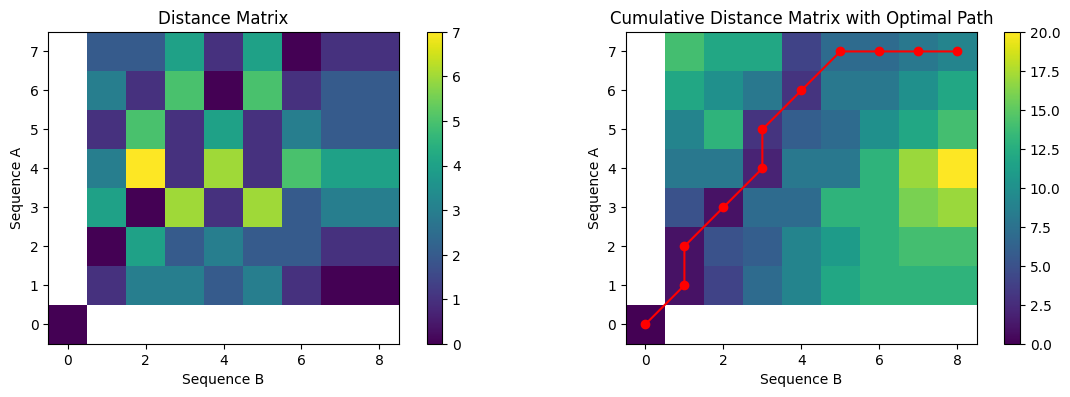

Optimal Distance: 9.0


In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(template1,template2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################
    n1=len(template1)
    n2=len(template2)
    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix =np.zeros((n1+1,n2+1))    # cummulative distance matrix
    DTW_cumulate_Matrix[0, 1:] = np.inf
    DTW_cumulate_Matrix[1:, 0] = np.inf
    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1,n1+1,1): #you can start from 1
        for j in range(1,n2+1,1):
            current_distance =np.mean(abs(template1[i-1]-template2[j-1]))      # Compute the euclidean distance between the current feature vectors
            DTW_cumulate_Matrix[i,j]=current_distance+min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    i=len(template1)
    j=len(template2)
    opt_distance=0
    optimal_path=[]
    optimal_path.append((i,j))
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        min_C=np.array([DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1]])
        min_ij=[[i-1,j],[i-1,j-1],[i,j-1]]
        idx=np.argmin(min_C)
        min_i,min_j=min_ij[idx]

        # Add the current indexes distance
        opt_distance = opt_distance + np.mean(abs(template1[i-1]-template2[j-1]))      #Compute the distance between the points sequence1[i] and sequence2[j]
        #Store the required indexes to obtain the optimal path
        i,j=min_i,min_j
        optimal_path.append((i,j))

    return opt_distance,optimal_path

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################


def plotDTWpath(sequence1,sequence2):

    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    n=len(sequence1)
    m=len(sequence2)
    #Compute distance and cumulative distance between the given templates
    DTW_distance_Matrix = np.zeros((n+1,m+1))
    DTW_distance_Matrix[0, 1:] = np.inf
    DTW_distance_Matrix[1:, 0] = np.inf
    DTW_cumulate_Matrix = np.zeros((n+1,m+1))
    DTW_cumulate_Matrix[0, 1:] = np.inf
    DTW_cumulate_Matrix[1:, 0] = np.inf
    for i in range(1,n+1,1): #you can start from 1
        for j in range(1,m+1,1):
            current_distance = np.mean(abs(sequence1[i-1]-sequence2[j-1]))      #Compute the distance between the two points
            DTW_cumulate_Matrix[i,j]=current_distance+min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])
            DTW_distance_Matrix[i,j]=current_distance

    opt_distance,optimal_path=DTW(sequence1,sequence2)
    #Obtain the optimal path using "DTW" function
    fig,ax=plt.subplots(1,2,figsize=(12,4))
    ax[0].imshow(DTW_distance_Matrix, origin='lower', cmap='viridis')
    ax[0].set_title('Distance Matrix')
    # ax[0].colorbar()
    ax[0].set_xlabel('Sequence B')
    ax[0].set_ylabel('Sequence A')
    fig.colorbar(ax[0].imshow(DTW_distance_Matrix, origin='lower', cmap='viridis'), ax=ax[0])

    # Plot the cumulative distance matrix with the optimal path
    ax[1].imshow(DTW_cumulate_Matrix, origin='lower', cmap='viridis')
    ax[1].set_title('Cumulative Distance Matrix with Optimal Path')
    # plt.colorbar()
    ax[1].set_xlabel('Sequence B')
    ax[1].set_ylabel('Sequence A')
    fig.colorbar(ax[1].imshow(DTW_cumulate_Matrix, origin='lower', cmap='viridis'), ax=ax[1])
    # Plot the optimal path
    optimal_path = np.array(optimal_path)
    ax[1].plot(optimal_path[:, 1], optimal_path[:, 0], color='red', marker='o')
    plt.tight_layout()

    plt.show()

    print("Optimal Distance:", opt_distance)
    return opt_distance
A=[4,3,7,0,2,6,5]
B=[3,7,1,6,1,5,4,4]
opt_distance=plotDTWpath(A,B)

<b> Report your observations </b>

1.The optimal path is not definitely a diagonal always it can travel in horizontal or vertical line along for few indices

2.It measures similarity between two sequences by aligning them in time, allowing for non-linear distortions in the time axis.


3.DTW effectively aligns two sequences with varying lengths, preserving their temporal relationship even if one sequence is stretched or compressed compared to the other.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
# from matplotlib import pyplot as plt
# import numpy as np
# import scipy.io.wavfile
# import io
# import os
# from IPython.display import Audio

# #### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
# # !rm recording.wav


# digits = list(range(10))
# for digit in digits:
#   #### You can run this module in the loop to record more repetitions of the digits.
#   if os.path.isfile(f"{digit}.wav"):
#       print(f"wavefile exists, later part of the code uses {digit}.wav as input speech")
#   else:
#       print(f"Recording training data for digit {digit}...")
#       wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
#       wav = wav.set_frame_rate(16000)
#       sig=wav.get_array_of_samples()
#       samples=np.array(sig).T.astype(np.float32)
#       fp_arr = np.array(samples).T.astype(np.float32)
#       fp_arr /= np.iinfo(sig.typecode).max
#       scipy.io.wavfile.write(f"{digit}.wav", 16000, fp_arr) #Please change the name.

#   wn = Audio(f"{digit}.wav", autoplay=True)
#   # display(wn)
# for digit in digits:
#   for i in range(3):
#         print(f"Recording testing data for digit {digit}, repetition {i+1}...")
#         #### You can run this module in the loop to record more repetitions of the digits.
#         if os.path.isfile(f"{digit}_{i}.wav"):
#             print(f"wavefile exists, later part of the code uses {digit}_{i+1}.wav as input speech")
#         else:
#             print(f"Recording training data for digit {digit}...")
#             wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
#             wav = wav.set_frame_rate(16000)
#             sig=wav.get_array_of_samples()
#             samples=np.array(sig).T.astype(np.float32)
#             fp_arr = np.array(samples).T.astype(np.float32)
#             fp_arr /= np.iinfo(sig.typecode).max
#             scipy.io.wavfile.write(f"{digit}_{i+1}.wav", 16000, fp_arr) #Please change the name.

#         wn = Audio(f"{digit}_{i}.wav", autoplay=True)
#         # display(wn)


wavefile exists, later part of the code uses 0.wav as input speech
wavefile exists, later part of the code uses 1.wav as input speech
wavefile exists, later part of the code uses 2.wav as input speech
wavefile exists, later part of the code uses 3.wav as input speech
wavefile exists, later part of the code uses 4.wav as input speech
wavefile exists, later part of the code uses 5.wav as input speech
wavefile exists, later part of the code uses 6.wav as input speech
wavefile exists, later part of the code uses 7.wav as input speech
wavefile exists, later part of the code uses 8.wav as input speech
wavefile exists, later part of the code uses 9.wav as input speech
Recording testing data for digit 0, repetition 1...
wavefile exists, later part of the code uses 0_1.wav as input speech
Recording testing data for digit 0, repetition 2...
wavefile exists, later part of the code uses 0_2.wav as input speech
Recording testing data for digit 0, repetition 3...
wavefile exists, later part of the c

In [ ]:
import numpy as np
import os
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
from google.colab import drive
drive.mount('/content/drive')

train_data_path = "/content/drive/MyDrive/data/train"
test_data_path = "/content/drive/MyDrive/data/test"


# List train data files
train_files = os.listdir(train_data_path)
print("Train Data Files:", train_files)

# List test data files
test_files = os.listdir(test_data_path)
print("Test Data Files:", test_files)

# Define a function to extract the label from the filename
def extract_label(filename):
    return int(filename.split('_')[0])

# Create labels for train files
train_labels = [extract_label(filename) for filename in train_files]

# Create labels for test files
test_labels = [extract_label(filename) for filename in test_files]

print("Train Labels:", train_labels)
print("Test Labels:", test_labels)

# Combine train files and labels
train_data_with_labels = list(zip(train_files, train_labels))

# Sort train data based on labels
train_data_with_labels_sorted = sorted(train_data_with_labels, key=lambda x: x[1])

# Unzip sorted train data into separate lists
train_files_sorted, train_labels_sorted = zip(*train_data_with_labels_sorted)

# Combine test files and labels
test_data_with_labels = list(zip(test_files, test_labels))

# Sort test data based on labels
test_data_with_labels_sorted = sorted(test_data_with_labels, key=lambda x: x[1])

# Unzip sorted test data into separate lists
test_files_sorted, test_labels_sorted = zip(*test_data_with_labels_sorted)


train=[]
test=[]

# Process train data
for file_name in train_files_sorted:
    file_path = os.path.join(train_data_path, file_name)
    (rate, sig) = wav.read(file_path)
    sig = sig - np.mean(sig)
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
    train.append(mfcc_feat_cmvn)

# Process test data
for file_name in test_files_sorted:
    file_path = os.path.join(test_data_path, file_name)
    (rate, sig) = wav.read(file_path)
    sig = sig - np.mean(sig)
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
    test.append(mfcc_feat_cmvn)

print(len(train))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data Files: ['0_jackson_0.wav', '6_jackson_0.wav', '7_jackson_0.wav', '5_jackson_0.wav', '9_jackson_0.wav', '1_jackson_0.wav', '2_jackson_0.wav', '4_jackson_0.wav', '8_jackson_0.wav', '3_jackson_0.wav']
Test Data Files: ['2_jackson_3.wav', '5_jackson_1.wav', '3_jackson_1.wav', '9_jackson_1.wav', '0_jackson_1.wav', '6_jackson_3.wav', '1_jackson_2.wav', '1_jackson_1.wav', '2_jackson_1.wav', '0_jackson_2.wav', '3_jackson_2.wav', '4_jackson_2.wav', '7_jackson_3.wav', '4_jackson_1.wav', '3_jackson_3.wav', '5_jackson_3.wav', '6_jackson_2.wav', '7_jackson_2.wav', '4_jackson_3.wav', '1_jackson_3.wav', '5_jackson_2.wav', '8_jackson_3.wav', '2_jackson_2.wav', '0_jackson_3.wav', '8_jackson_2.wav', '6_jackson_1.wav', '7_jackson_1.wav', '9_jackson_3.wav', '8_jackson_1.wav', '9_jackson_2.wav']
Train Labels: [0, 6, 7, 5, 9, 1, 2, 4, 8, 3]
Test Labels: [2, 5, 3, 9, 0, 

In [ ]:
# import scipy.io.wavfile as wav
# !pip -q install python_speech_features
# !pip -q install speechpy
# from python_speech_features import mfcc
# import speechpy

# train=[]
# test=[]
# for digit in digits:
#   (rate,sig) = wav.read(f'{digit}.wav')
#   sig=sig-np.mean(sig)
#   mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
#   mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
#   # print(mfcc_feat_cmvn)
#   train.append(mfcc_feat_cmvn)
# for digit in digits:
#   for i in range(3):
#     (rate,sig) = wav.read(f'{digit}_{i+1}.wav')
#     sig=sig-np.mean(sig)
#     mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
#     mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
#     # print(mfcc_feat_cmvn)
#     test.append(mfcc_feat_cmvn)
# train=np.array(train)
# test=np.array(test)

**Algorithm to perform isolated digit recognition**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(template1,template2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################
    n1,m1=template1.shape
    n2,m2=template2.shape
    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix =np.zeros((n1+1,n2+1))    # cummulative distance matrix
    DTW_cumulate_Matrix[0, 1:] = np.inf
    DTW_cumulate_Matrix[1:, 0] = np.inf
    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1,n1+1,1): #you can start from 1
        for j in range(1,n2+1,1):
            current_distance =np.mean(abs(template1[i-1]-template2[j-1]))      # Compute the euclidean distance between the current feature vectors
            DTW_cumulate_Matrix[i,j]=current_distance+min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    i=len(template1)-1
    j=len(template2)-1
    opt_distance=0
    optimal_path=[]
    optimal_path.append((i,j))
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        min_C=np.array([DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1]])
        min_ij=[[i-1,j],[i-1,j-1],[i,j-1]]
        idx=np.argmin(min_C)
        min_i,min_j=min_ij[idx]

        # Add the current indexes distance
        opt_distance = opt_distance + np.mean(abs(template1[i]-template2[j]))      #Compute the distance between the points sequence1[i] and sequence2[j]
        #Store the required indexes to obtain the optimal path
        i,j=min_i,min_j
        optimal_path.append((i,j))

    return opt_distance,optimal_path
    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################



**Plot the optimal DTW path**

Both are same number:


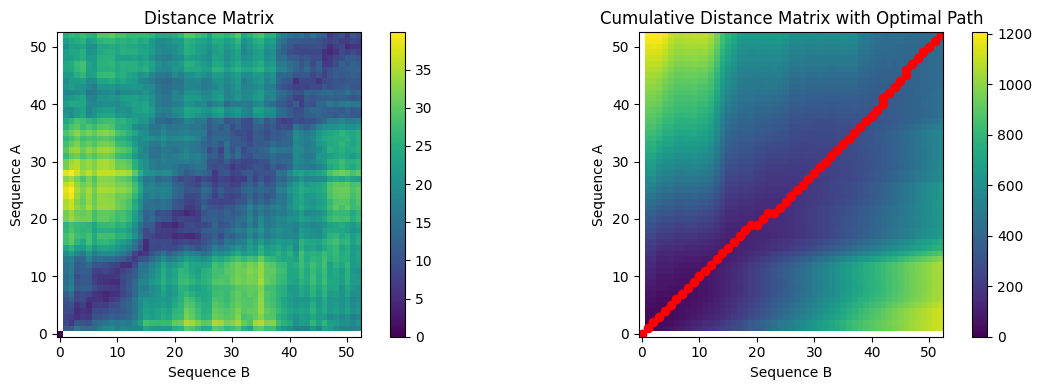

Optimal Distance: 428.8141555786133
Both are different numbers:


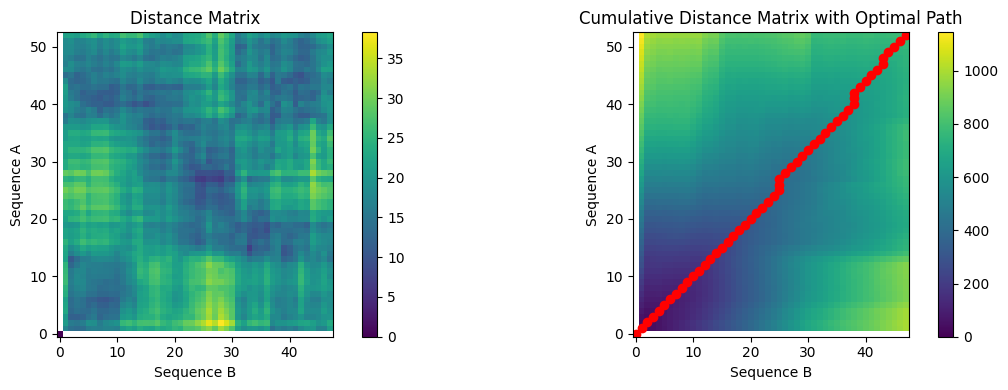

Optimal Distance: 787.4355244636536


In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
print('Both are same number:')
opt_distance1=plotDTWpath(test[0],test[1])
print('Both are different numbers:')
opt_distance1=plotDTWpath(test[0],test[3])


**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

reg=[]
for j in range(len(test)):
  c=[]
  for i in range(len(train)):
    x,y=DTW(test[j],train[i])
    c.append(x)
  c=np.array(c)
  reg.append(np.argmin(c))

accuracy=0
predict_labels=[]
for i in range(len(reg)):
  predict_labels.append(i//3)
  if reg[i]==i//3:
    accuracy+=1

print(accuracy*100/len(reg))


# Initialize confusion matrix
confusion_matrix = np.zeros((len(test_labels), len(test_labels)), dtype=int)

# Perform recognition and update confusion matrix
for true_label, predicted_label in zip(test_labels, predict_labels):
    true_index = test_labels.index(true_label)
    predicted_index = test_labels.index(predicted_label)
    confusion_matrix[true_index, predicted_index] += 1
collapsed_matrix = confusion_matrix.reshape(10, 3, 10, 3).sum(axis=(1, 3))
# Print confusion matrix
print("Confusion Matrix:")
print(collapsed_matrix)

93.33333333333333
Confusion Matrix:
[[3 4 0 1 1 0 0 0 0 0]
 [2 2 3 0 1 0 0 1 0 0]
 [2 1 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


<b> Report your observations </b>

1.DTW has good accuracy in recognising the isolated digits

2.The optimal path for both combinations looks same like a diagonal but the the optimal distance varies a lot.

3.The most confused digits are zero and one.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [ ]:
#All imports
import numpy as np
import os
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
# from google.colab import drive
# drive.mount('/content/drive')

nicolas_train_data_path = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/nicolas_train"
nicolas_test_data_path = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/nicolas"

jackson_train_data_path = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/jackson_train"
jackson_test_data_path = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/jackson"

yweweler_train_data_path = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/yweweler_train"
yweweler_test_data_path = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/yweweler"

theo_train_data_path = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/theo_train"
theo_test_data_path = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/theo"

# List train data files
nicolas_train_files = os.listdir(nicolas_train_data_path)
print("Train Data Files:", nicolas_train_files)

# List test data files
nicolas_test_files = os.listdir(nicolas_test_data_path)
print("Test Data Files:", nicolas_test_files)

# List train data files
jackson_train_files = os.listdir(jackson_train_data_path)
print("Train Data Files:", jackson_train_files)

# List test data files
jackson_test_files = os.listdir(jackson_test_data_path)
print("Test Data Files:", jackson_test_files)

# List train data files
yweweler_train_files = os.listdir(yweweler_train_data_path)
print("Train Data Files:", yweweler_train_files)

# List test data files
yweweler_test_files = os.listdir(yweweler_test_data_path)
print("Test Data Files:", yweweler_test_files)
# List train data files
theo_train_files = os.listdir(theo_train_data_path)
print("Train Data Files:", theo_train_files)

# List test data files
theo_test_files = os.listdir(theo_test_data_path)
print("Test Data Files:", theo_test_files)
# Define a function to extract the label from the filename
def extract_label(filename):
    return int(filename.split('_')[0])

def mfcc_convert(train_files,test_files,train_data_path,test_data_path):

  train_labels = [extract_label(filename) for filename in train_files]
  test_labels = [extract_label(filename) for filename in test_files]

  train_data_with_labels = list(zip(train_files, train_labels))
  train_data_with_labels_sorted = sorted(train_data_with_labels, key=lambda x: x[1])

  train_files_sorted, train_labels_sorted = zip(*train_data_with_labels_sorted)
  test_data_with_labels = list(zip(test_files, test_labels))

  test_data_with_labels_sorted = sorted(test_data_with_labels, key=lambda x: x[1])
  test_files_sorted, test_labels_sorted = zip(*test_data_with_labels_sorted)

  train=[]
  test=[]

  # Process train data
  for file_name in train_files_sorted:
      file_path = os.path.join(train_data_path, file_name)
      (rate, sig) = wav.read(file_path)
      sig = sig - np.mean(sig)
      mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
      mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
      train.append(mfcc_feat_cmvn)

  # Process test data
  for file_name in test_files_sorted:
      file_path = os.path.join(test_data_path, file_name)
      (rate, sig) = wav.read(file_path)
      sig = sig - np.mean(sig)
      mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
      mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
      test.append(mfcc_feat_cmvn)

  return train,test


nicolas_train,nicolas_test=mfcc_convert(nicolas_train_files,nicolas_test_files,nicolas_train_data_path,nicolas_test_data_path)
jackson_train,jackson_test=mfcc_convert(jackson_train_files,jackson_test_files,jackson_train_data_path,jackson_test_data_path)
yweweler_train,yweweler_test=mfcc_convert(yweweler_train_files,yweweler_test_files,yweweler_train_data_path,yweweler_test_data_path)
theo_train,theo_test=mfcc_convert(theo_train_files,theo_test_files,theo_train_data_path,theo_test_data_path)
#Suggest some of the changes to improve the system performance.









Train Data Files: ['9_nicolas_0.wav', '7_nicolas_0.wav', '5_nicolas_0.wav', '8_nicolas_0.wav', '3_nicolas_0.wav', '4_nicolas_0.wav', '2_nicolas_0.wav', '1_nicolas_0.wav', '0_nicolas_0.wav', '6_nicolas_0.wav']
Test Data Files: ['9_nicolas_46.wav', '2_nicolas_46.wav', '2_nicolas_9.wav', '5_nicolas_27.wav', '8_nicolas_29.wav', '9_nicolas_22.wav', '6_nicolas_7.wav', '8_nicolas_1.wav', '4_nicolas_16.wav', '4_nicolas_28.wav', '4_nicolas_12.wav', '3_nicolas_24.wav', '1_nicolas_4.wav', '1_nicolas_39.wav', '9_nicolas_8.wav', '2_nicolas_39.wav', '1_nicolas_14.wav', '5_nicolas_19.wav', '9_nicolas_17.wav', '3_nicolas_2.wav', '0_nicolas_21.wav', '4_nicolas_15.wav', '9_nicolas_7.wav', '9_nicolas_4.wav', '0_nicolas_1.wav', '9_nicolas_11.wav', '0_nicolas_16.wav', '3_nicolas_25.wav', '6_nicolas_27.wav', '3_nicolas_5.wav', '9_nicolas_2.wav', '2_nicolas_44.wav', '0_nicolas_15.wav', '0_nicolas_45.wav', '7_nicolas_34.wav', '4_nicolas_25.wav', '9_nicolas_5.wav', '7_nicolas_12.wav', '6_nicolas_10.wav', '0_ni

In [ ]:
def accuracy(train,test):
  reg=[]
  for j in range(len(test)):
    c=[]
    for i in range(len(train)):
      x,y=DTW(test[j],train[i])
      c.append(x)
    c=np.array(c)
    reg.append(np.argmin(c))
  n=int(len(test)/10)
  accuracy=0
  predict_labels=[]
  for i in range(len(reg)):
    predict_labels.append(i//3)
    if reg[i]==i//n:
      accuracy+=1

  print(accuracy*100/len(reg))
  return (accuracy*100/len(reg))

In [ ]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
nicolas_accuracy=accuracy(nicolas_train,nicolas_test)
jackson_accuracy=accuracy(jackson_train,jackson_test)
yweweler_accuracy=accuracy(yweweler_train,yweweler_test)
theo_accuracy=accuracy(theo_train,theo_test)

76.3265306122449
84.48979591836735
73.46938775510205
94.28571428571429


In [ ]:
nicolas_accuracy1=accuracy(jackson_train,nicolas_test)
nicolas_accuracy2=accuracy(yweweler_train,nicolas_test)
nicolas_accuracy3=accuracy(theo_train,nicolas_test)

jackson_accuracy1=accuracy(nicolas_train,jackson_test)
jackson_accuracy2=accuracy(yweweler_train,jackson_test)
jackson_accuracy3=accuracy(theo_train,jackson_test)

yweweler_accuracy1=accuracy(nicolas_train,yweweler_test)
yweweler_accuracy2=accuracy(jackson_train,yweweler_test)
yweweler_accuracy3=accuracy(theo_train,yweweler_test)

theo_accuracy1=accuracy(nicolas_train,theo_test)
theo_accuracy2=accuracy(jackson_train,theo_test)
theo_accuracy3=accuracy(yweweler_train,theo_test)

20.408163265306122
32.44897959183673
34.48979591836735
44.285714285714285
45.51020408163265
75.10204081632654
39.795918367346935
23.877551020408163
43.46938775510204
33.265306122448976
28.979591836734695
37.3469387755102


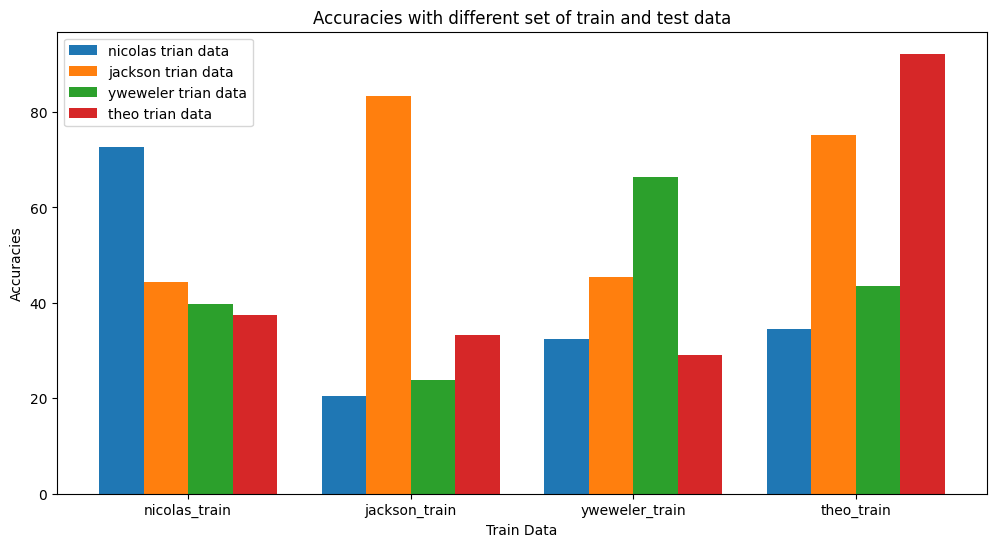

In [ ]:
train_data=['nicolas_train','jackson_train','yweweler_train','theo_train']
nicolas_accuracies=[nicolas_accuracy,nicolas_accuracy1,nicolas_accuracy2,nicolas_accuracy3]
jackson_accuracies=[jackson_accuracy1,jackson_accuracy,jackson_accuracy2,jackson_accuracy3]
yweweler_accuracies=[yweweler_accuracy1,yweweler_accuracy2,yweweler_accuracy,yweweler_accuracy3]
theo_accuracies=[theo_accuracy3,theo_accuracy1,theo_accuracy2,theo_accuracy]


plt.figure(figsize=(12,6))
bar_width = 0.2

# Set the positions of the bars on the x-axis
x = np.arange(len(train_data))

# Create the bars
plt.bar(x - 1.5*bar_width, nicolas_accuracies, width=bar_width, label='nicolas trian data')
plt.bar(x - 0.5*bar_width, jackson_accuracies, width=bar_width, label='jackson trian data')
plt.bar(x + 0.5*bar_width, yweweler_accuracies, width=bar_width, label='yweweler trian data')
plt.bar(x + 1.5*bar_width, theo_accuracies, width=bar_width, label='theo trian data')
plt.xlabel('Train Data')
plt.ylabel('Accuracies')
plt.title('Accuracies with different set of train and test data')
plt.xticks(x, train_data)
plt.legend()
plt.show()


<b> Report your observations </b>

1.The accuracies of same train and test data is higher in all cases

2.We can increase perform by using other metrics like cosine similarity or manhattan distance.

3.Combine the output of DTW with other recognition models, such as neural networks, to leverage the strengths of different approaches and improve overall accuracy.

